In [88]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [89]:
X,y = make_blobs(n_samples=1000,n_features=2,centers=2)

In [90]:
y[y==0] = -1

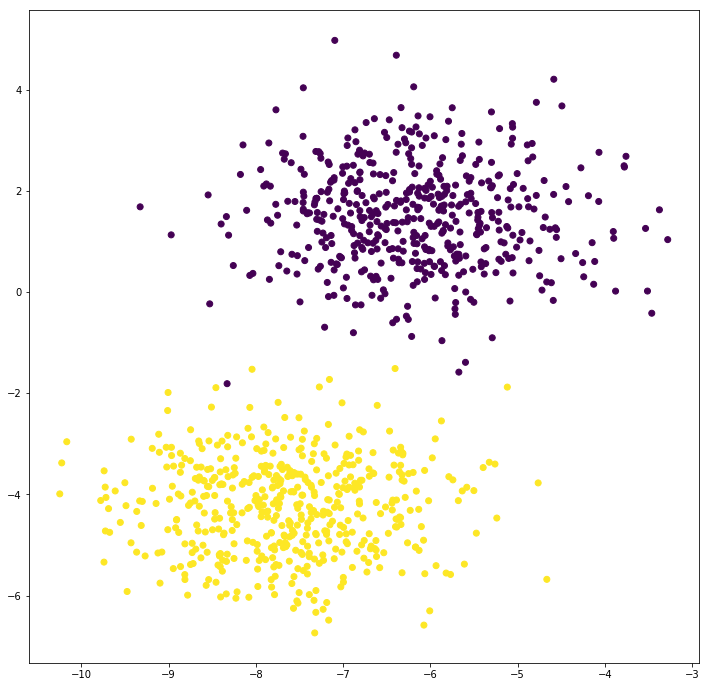

In [91]:
plt.figure(figsize=(12,12))
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [92]:
class SVM:
    
    def __init__(self,c=1):
        self.c = c
        self.w = 0
        self.b = 0
        
    def hingeLoss(self,X,Y,w,b):
        
        loss = 0.0
        loss += 0.5*np.dot(w,w.T)
        c = self.c
        
        for i in range(X.shape[0]):
            ti = Y[i]*(np.dot(w,X[i])+b)
            loss += c*max(0,1-ti)
            
        return loss[0][0]

    def fit(self,X,Y,batch_size=32,learning_rate=0.01,max_iteration=200):
        
        no_of_examples = X.shape[0]
        no_of_features = X.shape[1]
        
        losses = []
        w = np.zeros((1,no_of_features))
        b = 0
        c = self.c
        
        for itr in range(max_iteration):
            
            loss = self.hingeLoss(X,Y,w,b)
            losses.append(loss)
            idx = np.arange(0,no_of_examples)
            np.random.shuffle(idx)
            
            for mini_batch in range(0,no_of_examples,batch_size):
                
                gradew = 0
                gradeb = 0
                
                for j in range(mini_batch,mini_batch+batch_size):
                    
                    if j<no_of_examples:
                        
                        i = idx[j]
                        ti = Y[i]*(np.dot(w,X[i])+b)
                        
                        if ti>1:
                            gradew += 0
                            gradeb += 0
                            
                        else:
                            gradew += c*X[i]*Y[i]
                            gradeb += c*Y[i]
                
                w = w - learning_rate*w + learning_rate*gradew
                b = b + learning_rate*gradeb
        
        self.b = b
        self.w = w
        
        return losses

In [93]:
svm = SVM()

In [94]:
losses = svm.fit(X,y)

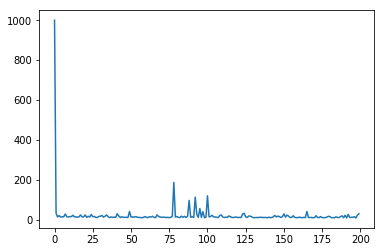

In [95]:
plt.plot(losses)
plt.show()

In [96]:
w1 = svm.w[0][0]
w2 = svm.w[0][1]
b = svm.b

In [99]:
def plot(y):
    
    plt.figure(figsize=(12,12))
    plt.xlim(-10,-2)
    plt.ylim(-8,6)
    plt.scatter(X[:,0],X[:,1],c=y)
    x1 = np.linspace(-10,5,20)
    x2 = -(w1*x1+b)/w2
    xp = -(w1*x1+b+1)/w2
    xn = -(w1*x1+b-1)/w2
    plt.plot(x1,x2)
    plt.plot(x1,xp)
    plt.plot(x1,xn)
    plt.show()
    

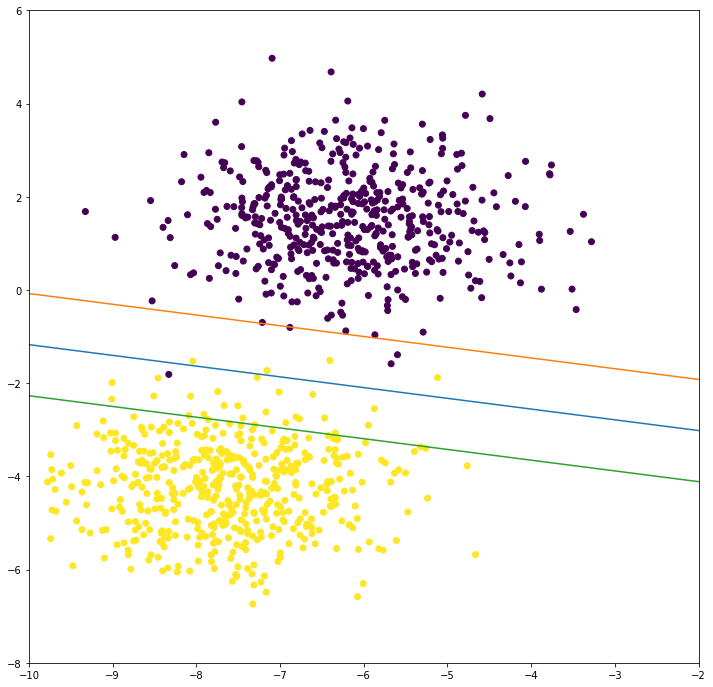

In [100]:
plot(y)